1回目: theta0 = 9.457, theta1 = 2.231, 差分 = 76061.5721
2回目: theta0 = 17.851, theta1 = 4.056, 差分 = 73049.5338
3回目: theta0 = 26.077, theta1 = 5.845, 差分 = 70156.7723
4回目: theta0 = 34.138, theta1 = 7.597, 差分 = 67378.5641
5回目: theta0 = 42.038, theta1 = 9.315, 差分 = 64710.3730
6回目: theta0 = 49.781, theta1 = 10.998, 差分 = 62147.8422
7回目: theta0 = 57.368, theta1 = 12.648, 差分 = 59686.7877
8回目: theta0 = 64.804, theta1 = 14.264, 差分 = 57323.1909
9回目: theta0 = 72.091, theta1 = 15.849, 差分 = 55053.1925
10回目: theta0 = 79.232, theta1 = 17.401, 差分 = 52873.0861
11回目: theta0 = 86.230, theta1 = 18.923, 差分 = 50779.3119
12回目: theta0 = 93.088, theta1 = 20.414, 差分 = 48768.4511
13回目: theta0 = 99.810, theta1 = 21.875, 差分 = 46837.2205
14回目: theta0 = 106.397, theta1 = 23.307, 差分 = 44982.4665
15回目: theta0 = 112.852, theta1 = 24.711, 差分 = 43201.1609
16回目: theta0 = 119.178, theta1 = 26.086, 差分 = 41490.3949
17回目: theta0 = 125.377, theta1 = 27.434, 差分 = 39847.3752
18回目: theta0 = 131.452, theta1 = 28.755, 差分 = 38269.4192
19

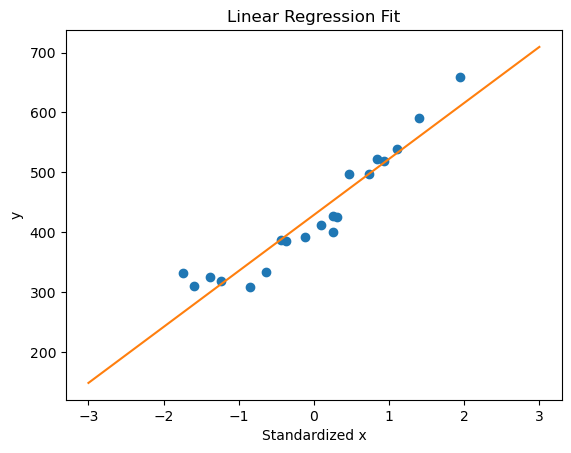

f(標準化(100)) = [370.96742094]
f(標準化(200)) = [510.46990019]
f(標準化(300)) = [649.97237944]


In [10]:
"""
最適化内容：

データ読み込みエラー処理：データの読み込み中に発生する可能性のあるエラーを処理します。
学習ループエラー処理：学習過程で発生するオーバーフローやその他の例外を処理します。
可視化エラー処理：可視化過程で発生する可能性のあるエラーを処理します。
検証エラー処理：予測値を計算する際に発生する可能性のあるエラーを処理します。
"""
import numpy as np
import matplotlib.pyplot as plt

# データファイルのパスを設定
file_path = 'click.csv'

try:
    # 学習データを読み込む
    train = np.loadtxt(file_path, delimiter=',', dtype='int', skiprows=1)
    train_x = train[:, 0]
    train_y = train[:, 1]
except Exception as e:
    print(f"{file_path} からデータを読み込む際にエラーが発生しました: {e}")
    exit(1)

# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

# 予測関数を定義
def f(x):
    return theta0 + theta1 * x

# 目的関数を定義 (誤差の計算)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

# 標準化関数を定義
mu = train_x.mean()
sigma = train_x.std()

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# 学習率と初期設定
ETA = 1e-3
diff = 1
count = 0
error = E(train_z, train_y)

# 学習ループ (誤差の差分が0.01以下になるまで)
while diff > 1e-2:
    try:
        # パラメータを更新
        tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
        tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

        # パラメータ値を更新
        theta0, theta1 = tmp_theta0, tmp_theta1

        # 新しい誤差を計算
        current_error = E(train_z, train_y)
        diff = error - current_error
        error = current_error

        # 学習ログを出力
        count += 1
        log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
        print(log.format(count, theta0, theta1, diff))
    except OverflowError as e:
        print(f"オーバーフローエラー: {e}")
        break
    except Exception as e:
        print(f"エラーが発生しました: {e}")
        break

# 学習結果を可視化
try:
    x = np.linspace(-3, 3, 100)
    plt.plot(train_z, train_y, 'o')
    plt.plot(x, f(x))
    plt.xlabel('Standardized x')
    plt.ylabel('y')
    plt.title('Linear Regression Fit')
    plt.show()
except Exception as e:
    print(f"プロット中にエラーが発生しました: {e}")

# 検証例
try:
    for val in [100, 200, 300]:
        standardized_val = standardize(np.array([val]))
        prediction = f(standardized_val)
        print(f"f(標準化({val})) = {prediction}")
except Exception as e:
    print(f"検証中にエラーが発生しました: {e}")